In [9]:
"""Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! 
Скачайте тренировочный датасэт и  обучите на нём Decision Tree.
После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся.
Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения"""

'Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! \nСкачайте тренировочный датасэт и  обучите на нём Decision Tree.\nПосле этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся.\nВведите число собачек в вашем датасэте.\n\nВ задании допускается определённая погрешность.\n\nP. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения'

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn import tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [13]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [14]:
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:70% !important;}</style>"
HTML(style)

In [15]:
dog_train=pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')


In [16]:
dog_test=pd.read_json('dataset_209691_15.txt')

In [17]:
dog_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,32,38.4,1,1,0
1,27,32.4,1,1,0
10,26,31.2,1,0,0
11,26,31.2,1,1,0
12,19,22.8,1,1,0


In [18]:
dog_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [19]:
X_train=dog_train.drop(['Вид'],axis=1)
y_train=dog_train.Вид


In [20]:
X_test=dog_test

In [21]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
clf.score(X_train,y_train)


1.0

In [24]:
pd.Series(clf.predict(X_test)).value_counts()


собачка    59
котик      41
dtype: int64

In [25]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X_train),
                                   class_names=['котика','собачка'],
                                   filled = True))

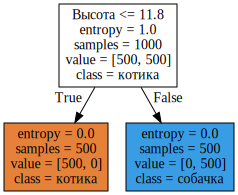

In [26]:
display(SVG(graph.pipe(format='svg')))